# 1. Basic Data inspection

In [1]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as pp
import seaborn as sns
from wordcloud import WordCloud
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Loading dataset

In [2]:
df = pd.read_csv("Airbnb_Data.csv")
pd.set_option('display.max_columns', 100) # To view all columns
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


## Shape and details of dataset

In [3]:
print('Rows: ',df.shape[0])
print('Columns: ',df.shape[1])

Rows:  74111
Columns:  29


In [4]:
print('Dataframe details: \n')
df.info(verbose=True)

Dataframe details: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_ver

In [5]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

## Basic statistical summary of the numerical columns

In [6]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


## Null Values

In [7]:
print('\nNull values in dataset:\n')
df.isnull().sum().sort_values(ascending=False)


Null values in dataset:



host_response_rate        18299
review_scores_rating      16722
first_review              15864
last_review               15827
thumbnail_url              8216
neighbourhood              6872
zipcode                     966
bathrooms                   200
host_identity_verified      188
host_since                  188
host_has_profile_pic        188
beds                        131
bedrooms                     91
description                   0
name                          0
property_type                 0
room_type                     0
amenities                     0
number_of_reviews             0
accommodates                  0
longitude                     0
city                          0
latitude                      0
bed_type                      0
instant_bookable              0
cancellation_policy           0
cleaning_fee                  0
log_price                     0
id                            0
dtype: int64

# 2. Visualization

## Converting boolean and log values

In [8]:
# Replacing columns with f/t and boolean with 0/1
df = df.infer_objects(copy=False).replace({'f': 0, 't': 1})
df = df.infer_objects(copy=False).replace({False: 0, True: 1})

df['price'] = round(np.exp(df['log_price']), 2)

C:\Users\robbi\AppData\Local\Temp\ipykernel_220\600328113.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.infer_objects(copy=False).replace({'f': 0, 't': 1})
C:\Users\robbi\AppData\Local\Temp\ipykernel_220\600328113.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.infer_objects(copy=False).replace({False: 0, True: 1})


## Calculating price per person

In [9]:
df['price_per_person'] = df['price']/df['accommodates']

## Histogram for all numerical data

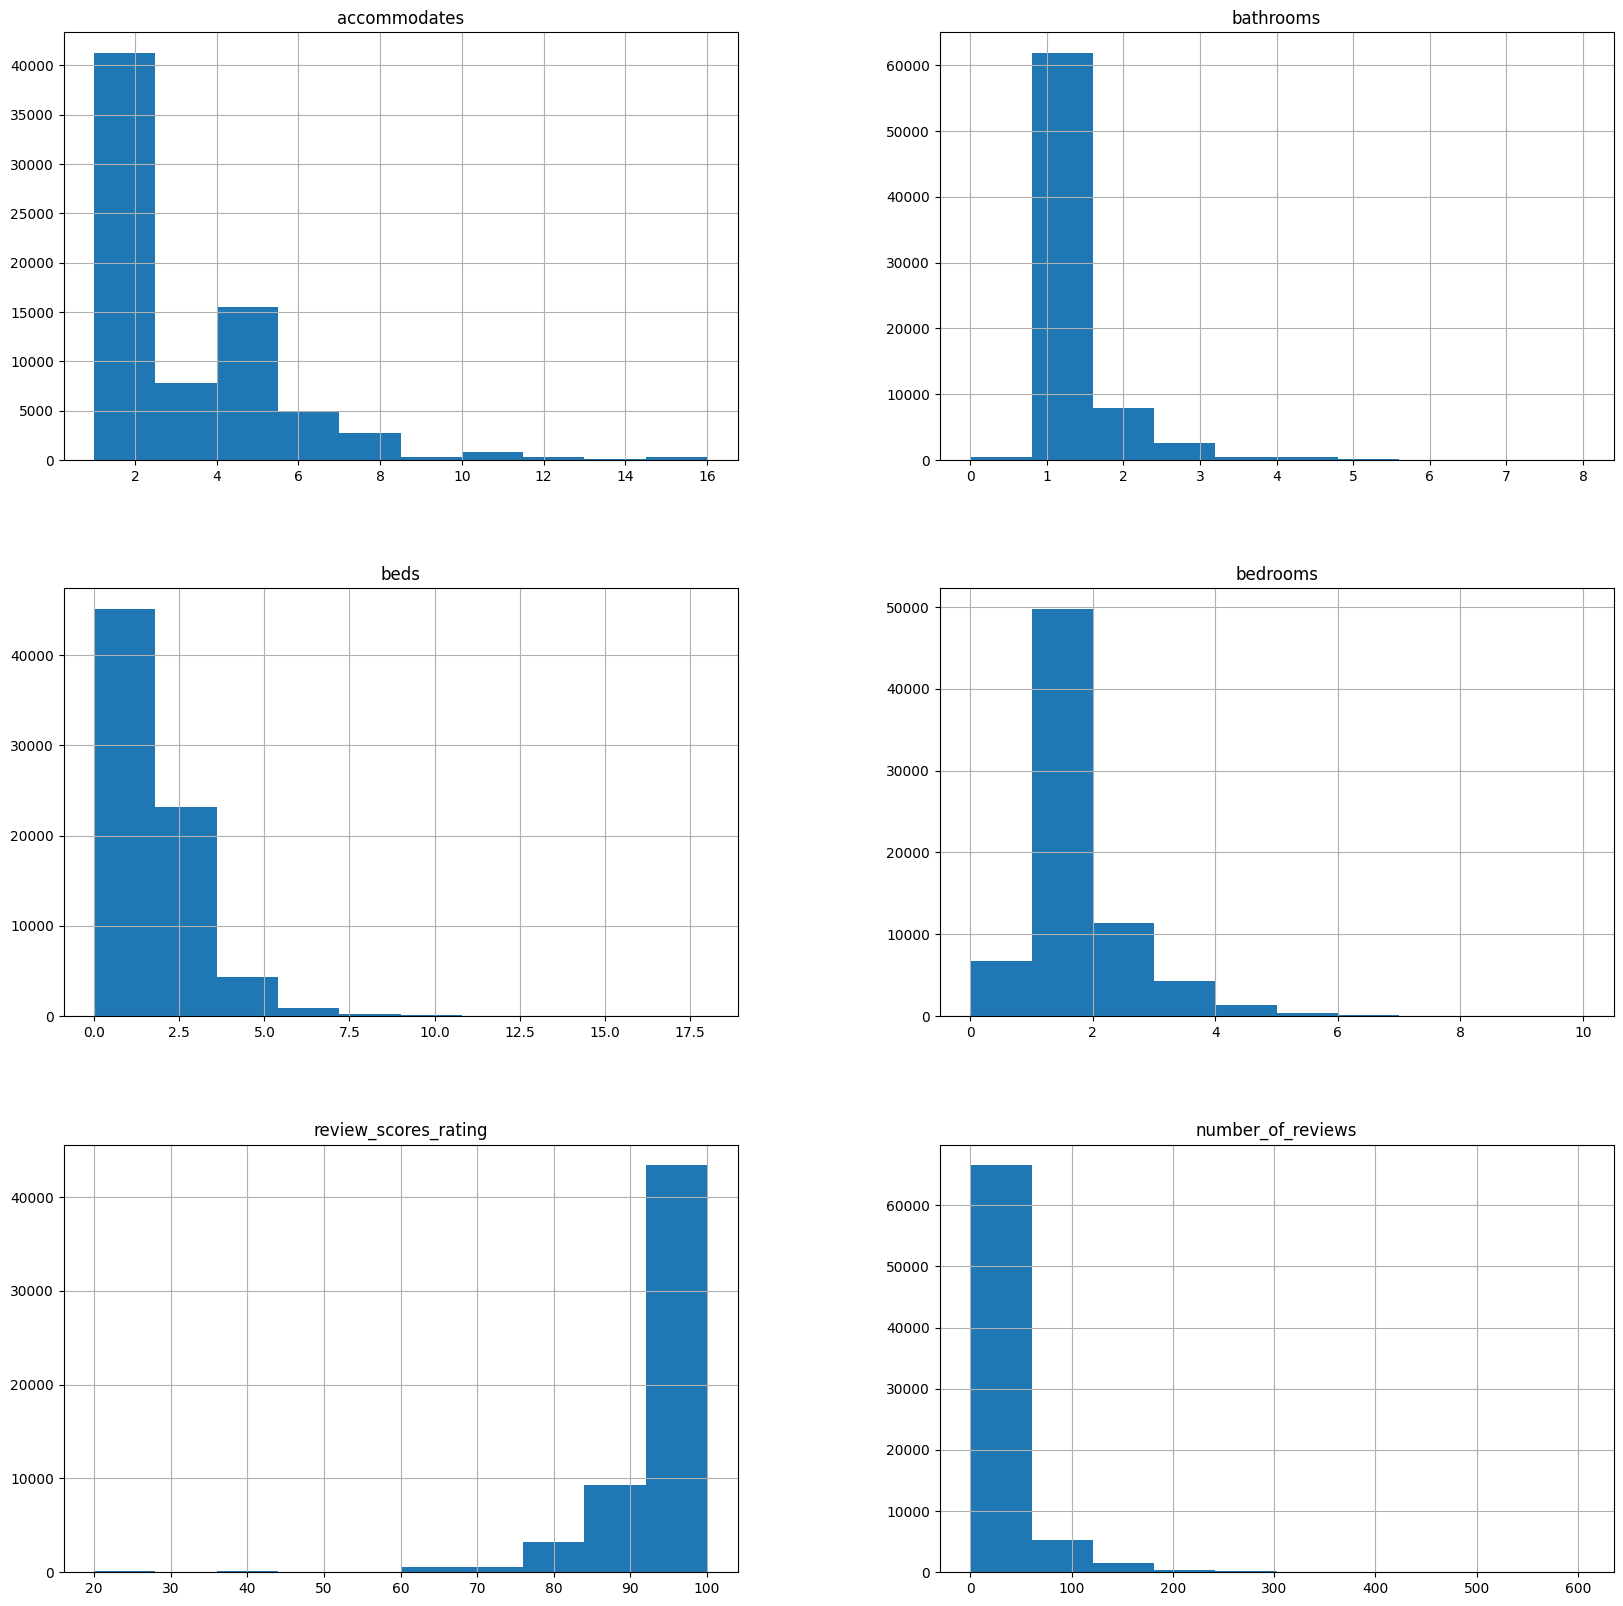

In [10]:
# Plotting the distribution of numerical features
numerical_features = ['accommodates', 'bathrooms', 'beds', 'bedrooms', 'review_scores_rating', 'number_of_reviews', 'host_response_rate']
df[numerical_features].hist(figsize=(20,20));

## Box plots

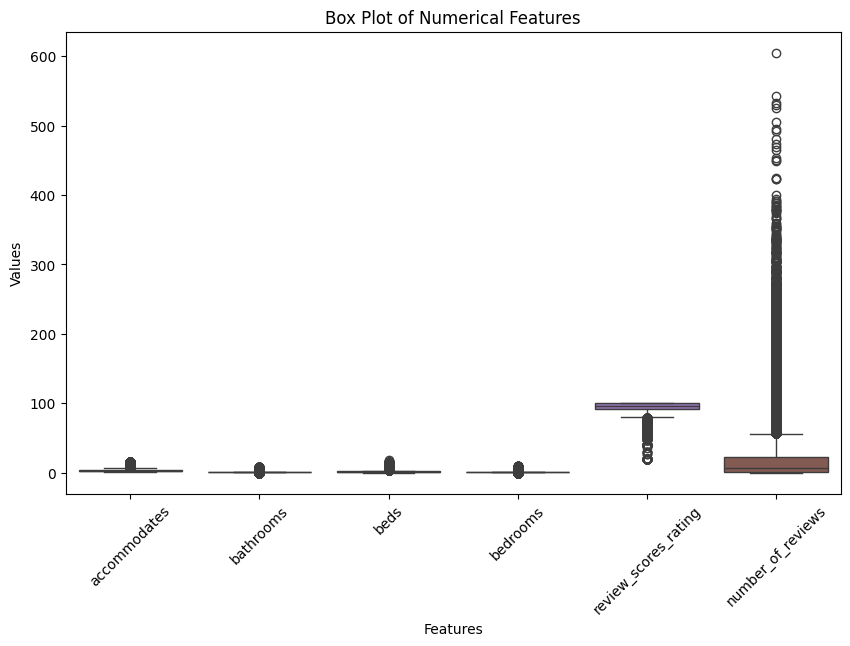

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_features])
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

## Price by room_type

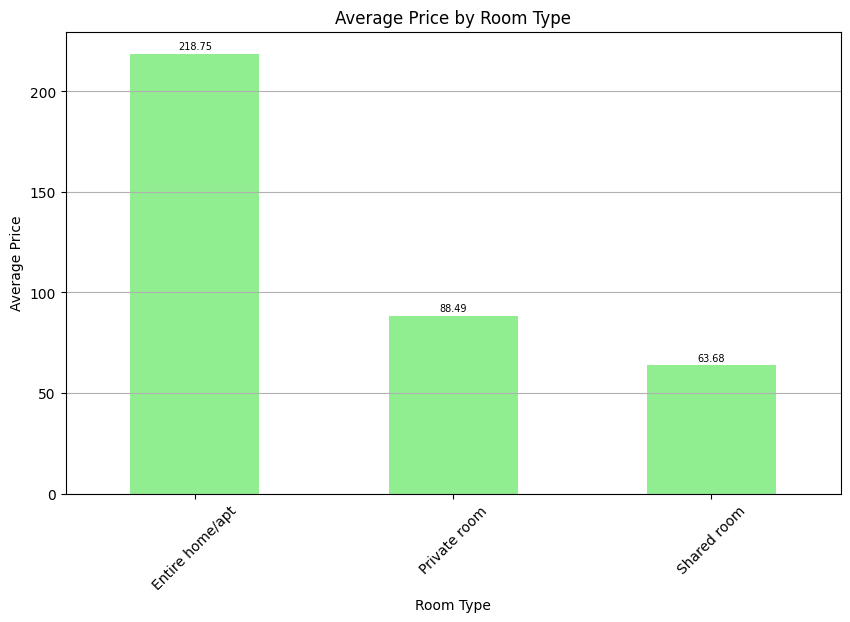

In [13]:
avg_price_by_room_type = df.groupby('room_type')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bars = avg_price_by_room_type.plot(kind='bar', color='lightgreen')
for i, v in enumerate(avg_price_by_room_type):
    plt.text(i, v + 1, str(round(v, 2)), ha='center', va='bottom', fontsize=7)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Price Trends Over Time as 'first_review' is in datetime format)

In [15]:
df['first_review'] = pd.to_datetime(df['first_review'])
df['first_review'].dt.year

0        2016.0
1        2017.0
2        2017.0
3           NaN
4        2015.0
          ...  
74106       NaN
74107    2016.0
74108    2015.0
74109       NaN
74110    2013.0
Name: first_review, Length: 74111, dtype: float64

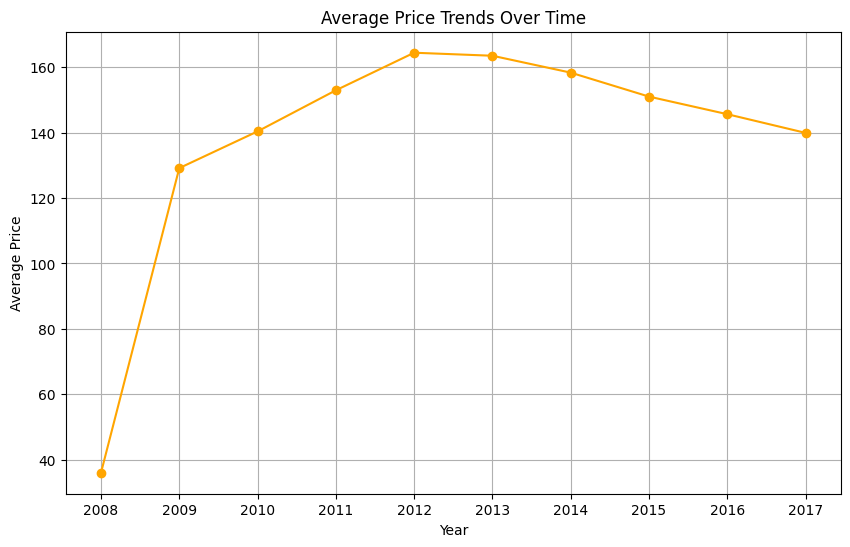

In [16]:
df['year'] = df['first_review'].dt.year
avg_price_by_year = df.dropna(subset=['first_review']).groupby('year')['price'].mean()
plt.figure(figsize=(10, 6))
avg_price_by_year.plot(marker='o', color='orange')
plt.title('Average Price Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.xticks(avg_price_by_year.index)
plt.show()

## Average price by City

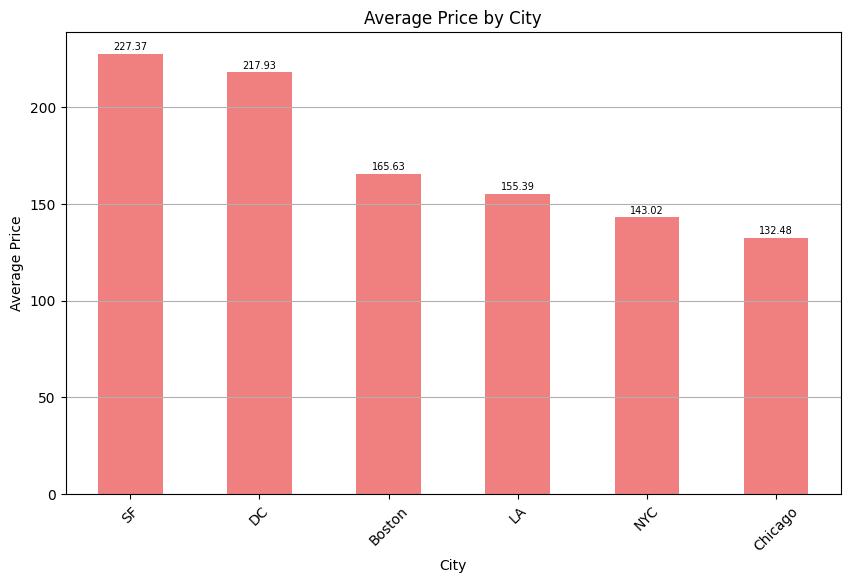

In [17]:
plt.figure(figsize=(10, 6))
avg_price_by_city = df.groupby('city')['price'].mean().sort_values(ascending=False)
bars = avg_price_by_city.plot(kind='bar', color='lightcoral')
for i, v in enumerate(avg_price_by_city):
    plt.text(i, v + 1, str(round(v, 2)), ha='center', va='bottom', fontsize=7)
plt.title('Average Price by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()